# MODULES


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn import datasets
from statsmodels.distributions import ECDF

sns.set()


___

# SUMMARY STATISTICS
## Sample Statistics

As mentioned earlier, and as every generalization we'll make, the value of the parameters of interest will be infered from the sample data; more specifically, we will use the values of the corresponding sample **statistics**. 

A few important limitations:
+ a sample is only part of the population; the numerical value of its statistic will not be the exact value of the parameter.
+ the observed value of the statistic depends on the selected sample.
+ some variability in the values of a statistic, over different samples, is unavoidable.


## Maximum Likelihood Estimate

The [**Maximum Likelihood Estimator**](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation) is the value of the parameter space (i.e. the set of all values the parameter can take) that is the **most likely** to have **generated our sample**. 

+ for discrete distributions, the MLE of the probability of success is equal to successes / total trials.
+ for continuous distributions:
    + the MLE of the population mean is the sample mean. 
    + the MLE of the population variance is the sample variance.

As the sample size increases, the MLE converges towards the true value of the population parameter.

_Note: in more complex problems, the MLE can only be found via numerical optimization._


## Confidence Interval

Due to the random nature of sampling, some samples are not representative of the population. It means that a small proportion of samples, typically noted $\alpha$, will produce incorrect inferences. This probability of errors can be controlled to build **(1 - $\alpha$) Percent Confidence Intervals**. 

This means that for (1 - $\alpha$) percents of all samples, the calculated interval will actually include the parameter value.

_Note: this is not a probability. The interval either includes the parameter value or it doesn't._


In [ ]:
# load & format iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['species'] = [iris.target_names[i] for i in iris.target]

# petal lenghts of each species
setosa_petal_length = iris_df.loc[iris_df['species'] == 'setosa', 'petal length (cm)'].to_numpy()
versicolor_petal_length = iris_df.loc[iris_df['species'] == 'versicolor', 'petal length (cm)'].to_numpy()
virginica_petal_length = iris_df.loc[iris_df['species'] == 'virginica', 'petal length (cm)'].to_numpy()

# sample statistics for iris species
for species, petal_length in zip(['setosa', 'versicolor', 'virginica'], [setosa_petal_length, versicolor_petal_length, virginica_petal_length]):
    print('{: <10}: median: {:0.2} - mean: {:0.2} - std: {:0.2}'.format(species, np.median(petal_length), np.mean(petal_length), np.std(petal_length)))


___

# FROM SAMPLE TO POPULATION

## Sampling Distribution of Sample Statistics

The true value of a population's parameter is usually unknown; we try to estimate it based on the available sample data. But how does the sample statistics relate to the actual population parameter ?

As covered ealier:
+ the true value of a population's parameter is fixed.
+ a sample is only part of the population; the numerical value of its statistic will not be the exact value of the parameter.
+ the observed value of the statistic depends on the selected sample.
+ some variability in the values of a statistic, over different samples, is unavoidable.

As it depends on the sample, the sample statistic is random and has a **sampling distribution** we can study. 


## Central Limit Theorem

Let ${X_{1},\ldots ,X_{n}}$ be a sequence of independent and identically distributed (i.i.d.) random variables drawn from a distribution of expected value $\mu$ and finite variance $\sigma^2$. Let ${\bar {X}}_{n}$ be the sample average: ${\bar {X}}_{n} = ({X_{1} + \ldots + X_{n}}) / n$.

The [Law of Large Numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers) states that the sample mean converges to $\mu$ as the sample size increases.

The [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) states that during this convergence, the difference between the sample mean and its limit $\mu$ approximates the normal distribution with mean 0 and variance $\sigma ^{2}/n$. A very important property of the CLT is that it holds regardless of the distribution of $X_i$ _(see example below)_.

This means that for large samples (typically $n$ greater than 30), the sampling distribution of the sample mean is approximately normal and has the following parameters:

+ mean: $\mu$
+ standard deviation (called **standard error**): $\sigma / \sqrt{n}$


The example below illustrates the validity of the CLT even for distributions that are far from normal, provided the sample is large enough:

![missing](../../img/exp-clt.png)


## Confidence Interval

As shown in the example, the sample means can take a large range of values; some are quite far from the actual population mean. We usually have only one sample to study the population, with no way of knowing where our sample mean sits in the sampling distribution. What we can do is leverage the CLT to quantify this uncertainty and build a [confidence interval](https://en.wikipedia.org/wiki/Confidence_interval) for the population mean. 

Given a confidence percentage $1 - \alpha$, we can calculate the interval of values inside which $1 - \alpha$ percent of all samples means will fall. A small percentage $\alpha$ of all samples, the ones least representative of the population, will have a sample mean so far from the actual mean that it falls outside of this interval. 

As an example, 95% of all sample means are between -2 and +2 standard errors from the sampling distribution mean, which is the population mean $\mu$. It follows that for 95% of all the samples that could have been drawn from the population, the population mean is less than two standard errors away from the sample mean.

_Note: we have no way of knowing if our sample is part of these 95%; for $\alpha =$ 5% of all the possible samples, the confidence interval will not include $\mu$ and the inference will be incorrect. This is why $\alpha$ is called the Type I Error._


## Limits of the CLT

The CLT Confidence intervals **do not works** when either:

+ $\sigma$ is unknown.
+ the sample size $n$ is small.

The [Student’s t distribution](https://en.wikipedia.org/wiki/Student's_t-distribution) is used instead. 


___

# T-DISTRIBUTION
## Assumptions of the t-distribution

The sampling distribution of the sample mean has to be roughly normal for the t-distribution to work well. It means that either:

+ the population is normally distributed, even for small samples.
+ the sample is large, regardless of the underlying distribution of data, thanks to the CLT.

If the sample size is very small, we can use normal probability plots to check whether the sample may come from a normal distribution. 


## Properties of the t-distribution

Small samples are more likely to underestimate $\sigma$ and have a mean that differs from $\mu$. The t-distribution accounts for this uncertainty with heavier tails compared to a Gaussian: the probability of extreme values becomes comparatively higher. This means its confidence intervals are wider than CLT ones for the same confidence level.

We have seen that under the assumptions of the CLT:

$$\frac { \bar {X_n} - \mu }{\sigma /\sqrt {n}} \sim N(0, 1)$$

Under the assumptions of the t-distribution, we can substitute the unbiased sample variance $\widehat {\sigma}^2$ to the sampling distribution of the sample mean  ([mathematical proof](https://www.math.arizona.edu/~jwatkins/ttest.pdf)):

$$\frac { \bar {X_n} - \mu }{\widehat {\sigma} /\sqrt {n}} \sim t_{n-1}$$

The distribution $t_{n-1}$ is the t-distribution with $n-1$ degrees of freedom.

_Note: the unbiased variance calculated from a sample of size $n$ uses $n-1$ to average the distances from the mean, in what is called the [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction), to [reduce the bias](https://dawenl.github.io/files/mle_biased.pdf)._

_Note: When the sample size is large (30+ observations), the Student Distribution becomes extremely close to the normal distribution._


## Confidence intervals

The $1 - \alpha$ T Confidence Interval is:

$$\bar{y} \pm T_{\alpha/2, n-1} \times \widehat {\sigma}^2 / \sqrt{n}$$

Where $T_{\alpha/2, n-1}$ is the distance from the mean of the t-distribution with n-1 degrees of freedom above which lay $\alpha/2$ percent of all observations



## Example for the Exponential distribution

Back to the Exponential Distribution, the figure below shows the experimental sample mean distribution vs T vs Normal for different sample sizes: 2, 5, 10 and 20:
+ the t-distribution gets close to normal even for relatively small sample sizes. 
+ it does not approximate the empirical distribution very well for smaller sample sizes because its assumptions are not met: the exponential distribution is far from normal.

<img class="center-block" src="https://sebastienplat.s3.amazonaws.com/dc954f3e9562d53b7829a2adcd2854ff1490011103173"/>


___

# EXAMPLE

We can calculate the confidence interval for the mean petal length of three species of iris, based on their respective samples. The sample size is n=50, which is large enough that we can use the t-distribution.

![iris-ci](../../img/iris-ci.png)

The third plot shows that there is some overlap between the confidence interval of the population mean for versicolor and virginica.


___

# LIMITS OF SUMMARY STATISTICS - ANSCOMBES QUARTET

[Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet) comprises four data sets of eleven data points (see below) that have nearly identical descriptive statistics, yet have very different distributions and appear very different when [graphed](https://matplotlib.org/3.2.1/gallery/specialty_plots/anscombe.html). They were constructed in 1973 by the statistician Francis Anscombe to demonstrate both the importance of graphing data before analyzing it and the effect of outliers and other influential observations on statistical properties.

1. simple linear relationship with gaussian noise. 
1. clear non-linear relationship between variables; the Pearson correlation coefficient is not relevant here. A more general regression and the corresponding [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) would be more appropriate. 
1. the relationship is linear but  one outlier has enough influence to offset the calculated regression; it lowers the correlation coefficient from 1 to 0.816. A [robust regression](https://en.wikipedia.org/wiki/Robust_regression) would be more appropriate here.
1. example when one [high-leverage point](https://en.wikipedia.org/wiki/Leverage_(statistics)) is enough to produce a high correlation coefficient, even though the other data points do not indicate any relationship between the variables.


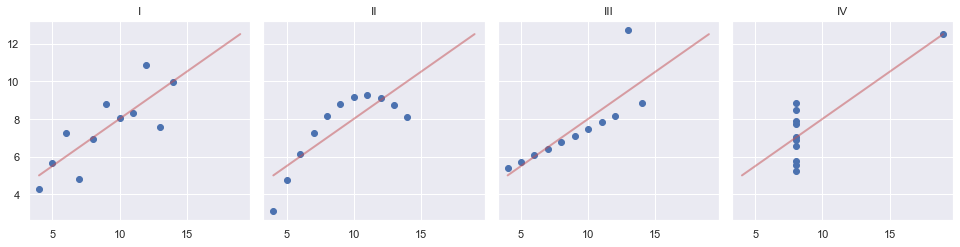

In [103]:
# data 
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

datasets = {
    'I': (x, y1),
    'II': (x, y2),
    'III': (x, y3),
    'IV': (x4, y4)
}

# create fig
fig, axs = plt.subplots(nrows=1, ncols=4, sharex=True, sharey=True, figsize=(15, 4))
x_lin = np.array([np.min(x+x4), np.max(x+x4)])

for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):

    # linear regression
    p1, p0 = np.polyfit(x, y, deg=1)
    y_lin = p1 * x_lin + p0

    # plot
    ax.plot(x, y, 'o')
    ax.plot(x_lin, y_lin, 'r-', alpha=0.5, lw=2)

    # add title
    ax.set_title(label)

plt.tight_layout(rect=[0, 0, 0.9, 0.9])
